In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(cls_train[0:5])
for i in range(10):
    print(class_names[cls_train[i]])


print(labels_train[:5,:])


(50000, 32, 32, 3)
[6 9 9 4 1]
frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


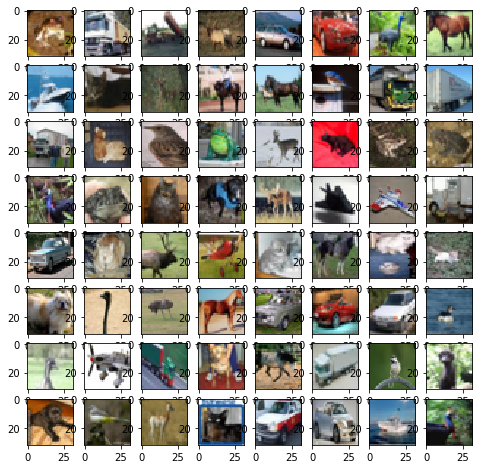

In [7]:

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

In [8]:
print(labels_test)
print(cls_test)
print(class_names)

In [9]:
for i in range(30):
    print(str(i)+" "+class_names[cls_test[i]])
print(class_names[cls_test[56]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[3 8 8 ... 5 1 7]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
0 cat
1 ship
2 ship
3 airplane
4 frog
5 frog
6 automobile
7 frog
8 cat
9 automobile
10 airplane
11 truck
12 dog
13 horse
14 truck
15 ship
16 dog
17 horse
18 ship
19 frog
20 horse
21 airplane
22 deer
23 truck
24 dog
25 bird
26 deer
27 airplane
28 truck
29 frog
horse


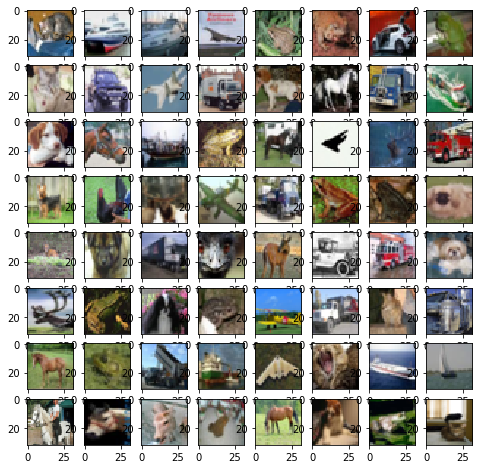

In [10]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_test[i],cmap=plt.cm.bone)
    
plt.show()


In [11]:
# reshaping images_train data
x_train=images_train.reshape((50000,(32*32*3)))
x_train.shape


(50000, 3072)

In [12]:
# applying pca on just first 400 data points
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train[0:400,])


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_.shape

(400, 3072)

In [14]:
k=0
total=sum(pca.explained_variance_)
current_sum=0
while(current_sum/total<0.99):
    current_sum+=pca.explained_variance_[k]
    k=k+1
k

253

In [15]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x_train[0:400,])
transformed_data.shape



(400, 253)

In [16]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 3072)

In [17]:
x_approx_images=x_approx.reshape((400,32,32,3))
x_approx_images.shape

# checking if 4 dimension after inverse transform is in range (0,1)
for i in range(100):
    for j in range(10):
        for k in range(10):
            for l in range(3):
                
                if(x_approx_images[i][j][k][l]>1):
                    print(x_approx_images[i][j][k][l])
                    
                
    
    
                
                    
                

1.028205871160845
1.0009712995640843
1.0379575842960658
1.010237169365889
1.0632883068350463
1.0492766147170312
1.0393138066107817
1.0161556897755009
1.027471904270526
1.019279919187769
1.0156810931781433
1.0059956271251047
1.0375130412614744
1.0248895088958538
1.0047004036246285
1.0305492650015857
1.0192809971529484
1.020779939176755
1.0102037402233504
1.01889808287565
1.0058475855888314
1.007106826349687
1.0187064379440443
1.0146055677306693
1.0046200824531535
1.016877811755365
1.0116879589946257
1.0039945193944386
1.0049091172305462
1.001309750262524
1.0137895685454499
1.0100859273079434
1.0174376006928205
1.012311274561602
1.0112560483003343
1.0109973065783755
1.0212580472538817
1.0098808416447818
1.0207487594714364
1.0224186999169733
1.0199254205795723
1.0052513021471923
1.0001242908690715
1.0615732998082406
1.0424469290076317
1.0414385123554006
1.0024652830329333
1.0030741592445487
1.0133263643822115
1.0053403026692056
1.0101485362604745
1.0128905593972408
1.0043549252167585
1.00

In [18]:
# here since 
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
    
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

In [19]:
from sklearn.ensemble import ( RandomForestClassifier,
                              GradientBoostingClassifier)

In [20]:
#grd = GradientBoostingClassifier()
#grd1 = RandomForestClassifier()


In [21]:
#grd.fit(x_train,cls_train)
#grd1.fit(x_train,cls_train)

In [22]:
#x_test=images_test.reshape((1000,(32*32*3)))

In [23]:
#y_test1=grd.predict(x_test)
#y_test2=grd1.predict(x_test)


In [36]:
y=[]
for i in range(len(cls_test)):
    y.append(class_names[cls_test[i]])


AttributeError: 'list' object has no attribute 'shape'

In [39]:
import numpy as np
y_test=np.array(y)
print(y_test.shape)
for i in range(1000):
    y_test[i]='cat'
#y_test

(10000,)


In [40]:

np.savetxt(r"C:\python files\cifar 10\output.csv",y_test,delimiter=",",fmt="%s")